# ENCORE basic demo
<p> In this notebook you'll learn how to generate synthetic MEC and LEC ratemaps, train the ENCORE model to reconstruct those ratemaps, and inspect hidden layers rate maps </p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from encore import Encore
from env import Arena
from utils import *

# Build training data structure

<li> Each input vector represents the population vector activity of MEC and LEC cells at a given location.
<li> 30% of the vector contains MEC cells, whereas 70% contains LEC cells.

In [2]:
# Make data structure combining both MEC and LEC_1
n_mec = 90
n_lec = 210
arena_size = [60,60]
arena = Arena(arena_size=arena_size, n_mec=n_mec, n_lec=n_lec)
data = arena.get_rateMaps()

# Example rate maps

MEC maps


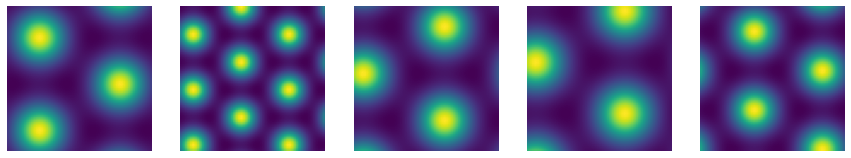


LEC maps


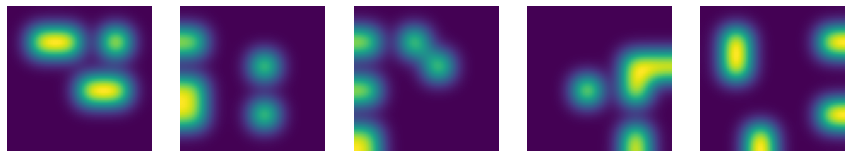

In [3]:
arena.plot_rateMaps()

# ENCORE model

<li> We then train an autoencoder to reconstruct the input vectors (MEC + LEC).

In [4]:
## Define the model's parameters
n_DG, n_CA3, n_CA1 = [100, 80, 100] 

model = Encore(n_DG=n_DG, n_CA3=n_CA3, n_CA1=n_CA1, dim=n_mec+n_lec)
history = model.train(data=data, epochs=200)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DG (Dense)                   (None, 100)               30100     
_________________________________________________________________
CA3 (Dense)                  (None, 80)                8080      
_________________________________________________________________
CA1 (Dense)                  (None, 100)               8100      
_________________________________________________________________
EC_deep (Dense)              (None, 300)               30300     
Total params: 76,580
Trainable params: 76,580
Non-trainable params: 0
_________________________________________________________________


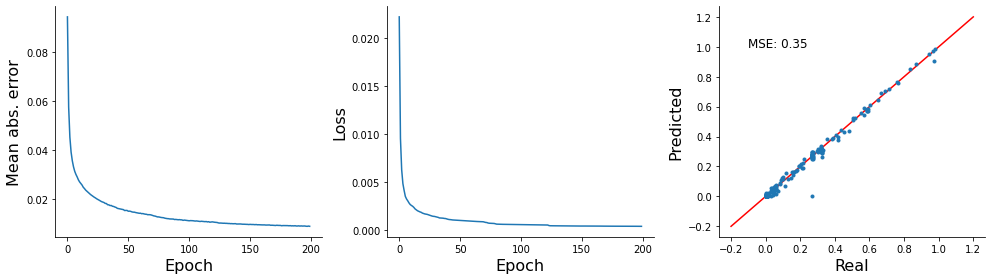

In [5]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(4)
fig.set_figwidth(14)
fig.set_facecolor('white')


ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
plt.sca(ax[0])
    
plt.plot(  history.epoch, history.history['mae'] )
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Mean abs. error', fontsize=16)


ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.sca(ax[1])

plt.plot( history.epoch, history.history['loss'] )
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
plt.sca(ax[2])

pos_n = 10
pred = model.test(np.array([data[pos_n]])).T
tt = 'MSE: ' + str( np.round(np.sqrt(np.sum(np.power(data[pos_n] - pred[:,0], 2) )),2) )

plt.plot( [-.2,1.2],[-.2,1.2],'r'  )
plt.plot( data[pos_n], pred , 'o', markersize=3)
plt.text(-.1,1,tt, fontsize=12)
plt.xlabel('Real', fontsize=16)
plt.ylabel('Predicted', fontsize=16)

plt.tight_layout()
plt.show()

# Extract firing rate maps for hidden layers
<p>Now randomly select a few neurons from each layer and see whether their firing rate resembles those of place cells.</p>

<h3>DG

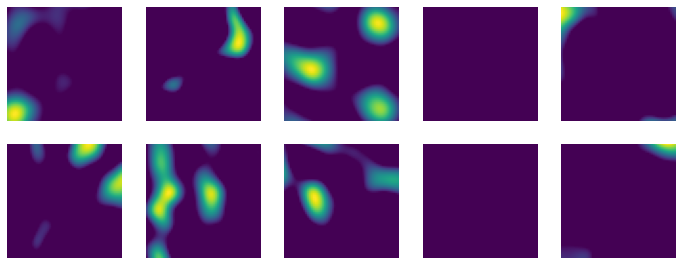

In [6]:
heatmaps_DG = np.zeros((n_DG, arena_size[0], arena_size[1]))
layer = 'DG'

heatmaps_DG = model.get_output(layer=layer, data=data)
maxx = heatmaps_DG.max()

fig = plt.figure(figsize=( 12, 50))

for i in range(10):
    plt.subplot(int(n_DG/5), 5, i+1)
    plt.imshow(heatmaps_DG[:,i].reshape(arena_size))
    plt.axis('off')

<h3>CA3

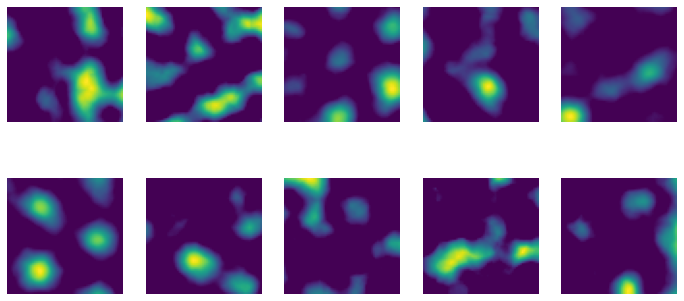

In [7]:
heatmaps_CA3 = np.zeros((n_CA3, arena_size[0], arena_size[1]))
layer = 'CA3'

heatmaps_CA3 = model.get_output(layer=layer, data=data)
maxx = heatmaps_CA3.max()

fig = plt.figure(figsize=( 12, 50))

for i in range(10):
    plt.subplot(int(n_CA3/5), 5, i+1)
    plt.imshow(heatmaps_CA3[:,i].reshape(arena_size))
    plt.axis('off')

<h3>CA1

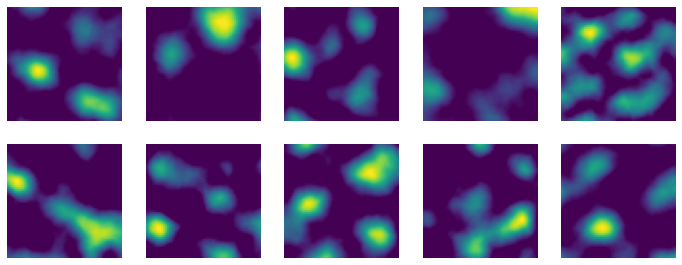

In [8]:
heatmaps_CA1 = np.zeros((n_CA1, arena_size[0], arena_size[1]))                  
layer = 'CA1'

heatmaps_CA1 = model.get_output(layer=layer, data=data)
maxx = heatmaps_CA1.max()

fig = plt.figure(figsize=( 12, 50))

for i in range(10):
    plt.subplot(int(n_CA1/5), 5, i+1)
    plt.imshow(heatmaps_CA1[:,i].reshape(arena_size)) 
    plt.axis('off')

### ... and these are the basics of ENCORE.
#### From here on you will be able to test multiple questions, such as memory capacity, novelty detection, rate remapping, and many more.